# [](http://)FINGERPRINT DETECTION USING ADVANCED CNN :

## Overview  
This notebook focuses on fingerprint detection using deep learning. The primary objective is to classify fingerprint images effectively by leveraging the power of the ResNet architecture.  

## Dataset  
The dataset consists of fingerprint images captured under varying conditions. The images are preprocessed to ensure consistency and prepared for input into the deep learning model.  

## Methodology  
The notebook is structured as follows:  

### 1. **Data Preprocessing**  
- **Image Normalization**: All images are normalized to have pixel values in the range [0, 1].  
- **Data Augmentation**: To enhance the dataset's diversity and prevent overfitting, augmentation techniques such as flipping, rotation, and scaling are applied.  
- **Dataset Splitting**: The dataset is split into training, validation, and test sets to ensure proper evaluation of the model.  

### 2. **Model: ResNet Architecture**  
The ResNet model is employed for its capability to learn deep representations efficiently through residual connections. The following techniques are applied:  
- **Residual Blocks**: These blocks help in mitigating the vanishing gradient problem, ensuring efficient gradient flow during backpropagation.  
- **Batch Normalization**: Applied after each convolutional layer to stabilize and accelerate training.  
- **Dropout**: Integrated at various stages to reduce overfitting and enhance generalization.  
- **Pooling and Flattening**: Max-pooling layers are used for dimensionality reduction, followed by global average pooling and fully connected layers for classification.  

### 3. **Training and Evaluation**  
- The model is trained using the training set with standard optimizers and learning rates.  
- Performance metrics such as accuracy, precision, recall, and F1-score are computed on the validation and test sets.  
- Training and validation loss/accuracy curves are plotted to monitor the learning progress.  

## Results  
The ResNet model achieves strong performance on the fingerprint detection task, demonstrating its suitability for this type of classification problem. Metrics from the validation and test sets are used to confirm the model's ability to generalize well.  


### 1. Import the libraries :

In [38]:
# import the operating system libir
import os
# calculations
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
# import the visualisations lib
import matplotlib.pyplot as plt
# import the dataloader from a floder
from keras.preprocessing import image_dataset_from_directory
# import the layers and normalization z score
from tensorflow.keras.layers import Normalization
import tensorflow.keras.layers as tfl
from tensorflow.keras import layers
# import the specific layers and the inializations(random unifrom ...)
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
# import the metrics :
from sklearn.metrics import confusion_matrix

### 2. Import The datasets:

In [5]:
# define the directory :
path_dir  = '/kaggle/input/fingerprint-data/Merge_data'

In [6]:
# set the image parameters (height weights and batch size) :
image_height = 60
image_width = 60
batch_size = 32

In [7]:
# load the data :
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    path_dir, # the directoryy
    labels = "inferred", # using the labels that exist in the folderss
    label_mode = "categorical", #one hot ecoodding
    batch_size = batch_size,
    image_size = (image_height, image_width),
    shuffle = True,
    seed = 42,
    validation_split = 0.4,
    subset = "training"
)

ds_val = tf.keras.preprocessing.image_dataset_from_directory(
    path_dir, # the directoryy
    labels = "inferred", # using the labels that exist in the folderss
    label_mode = "categorical", #one hot encoding
    batch_size = batch_size,
    image_size = (image_height, image_width),
    shuffle = True,
    seed = 42,
    validation_split = 0.4,
    subset = "validation"
)

Found 30000 files belonging to 8 classes.
Using 18000 files for training.
Found 30000 files belonging to 8 classes.
Using 12000 files for validation.


In [5]:
# create a function that transform the images into grayscale images (1 dimension) :
#def convert_to_grayscale(image, label):
    #grayscale_image = tf.image.rgb_to_grayscale(image)
    #grayscale_image = tf.squeeze(grayscale_image, axis=-1)
    #return grayscale_image, label

### 3. Split The dataset :

In [8]:
# devide the val data set into val and test data set 
val_batches = tf.data.experimental.cardinality(ds_val)
ds_test = ds_val.take(val_batches // 2)
ds_validation = ds_val.skip(val_batches // 2)

In [9]:
# displaying the range of labeles :
print('the labels are :', ds_train.class_names)

the labels are : ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


In [8]:
# converte the images into a grayscale representation
#ds_train = ds_train.map(convert_to_grayscale)
#ds_validation = ds_validation.map(convert_to_grayscale)
#ds_test = ds_test.map(convert_to_grayscale)

In [9]:
# apply the class names:
#ds_train.class_names = ["A+", "A-", "B+", "B-", "AB+", "AB-", "O+", "O-"]
#ds_validation.class_names = ds_train.class_names
#ds_test.class_names = ds_train.class_names

In [10]:
# displaying the shapes :
print('the number of batches in train set :', tf.data.experimental.cardinality(ds_train))
print('the number of batches in validation set :', tf.data.experimental.cardinality(ds_validation))
print('the number of batches in test set :', tf.data.experimental.cardinality(ds_test))

the number of batches in train set : tf.Tensor(563, shape=(), dtype=int64)
the number of batches in validation set : tf.Tensor(188, shape=(), dtype=int64)
the number of batches in test set : tf.Tensor(187, shape=(), dtype=int64)


### 4. Data Visualisation :

In [11]:
# displaying the shapes of images:
for img, lab in ds_train.take(1):
    image = img[0]
    label = lab[0]
    print('the shape of the image :', image.shape)
    print('the label of the image :', label.shape)

the shape of the image : (60, 60, 3)
the label of the image : (8,)


In [12]:
# image visualisation :

# initialization of a dictionary that contient 10 images by class 
images_by_class = {}

for images, labels in ds_train :
    for image, label in zip(images, labels):
        label = tf.argmax(label).numpy()
        if label not in images_by_class:
            images_by_class[label] = []
        if len(images_by_class[label]) < 10 :
            images_by_class[label].append(image.numpy())

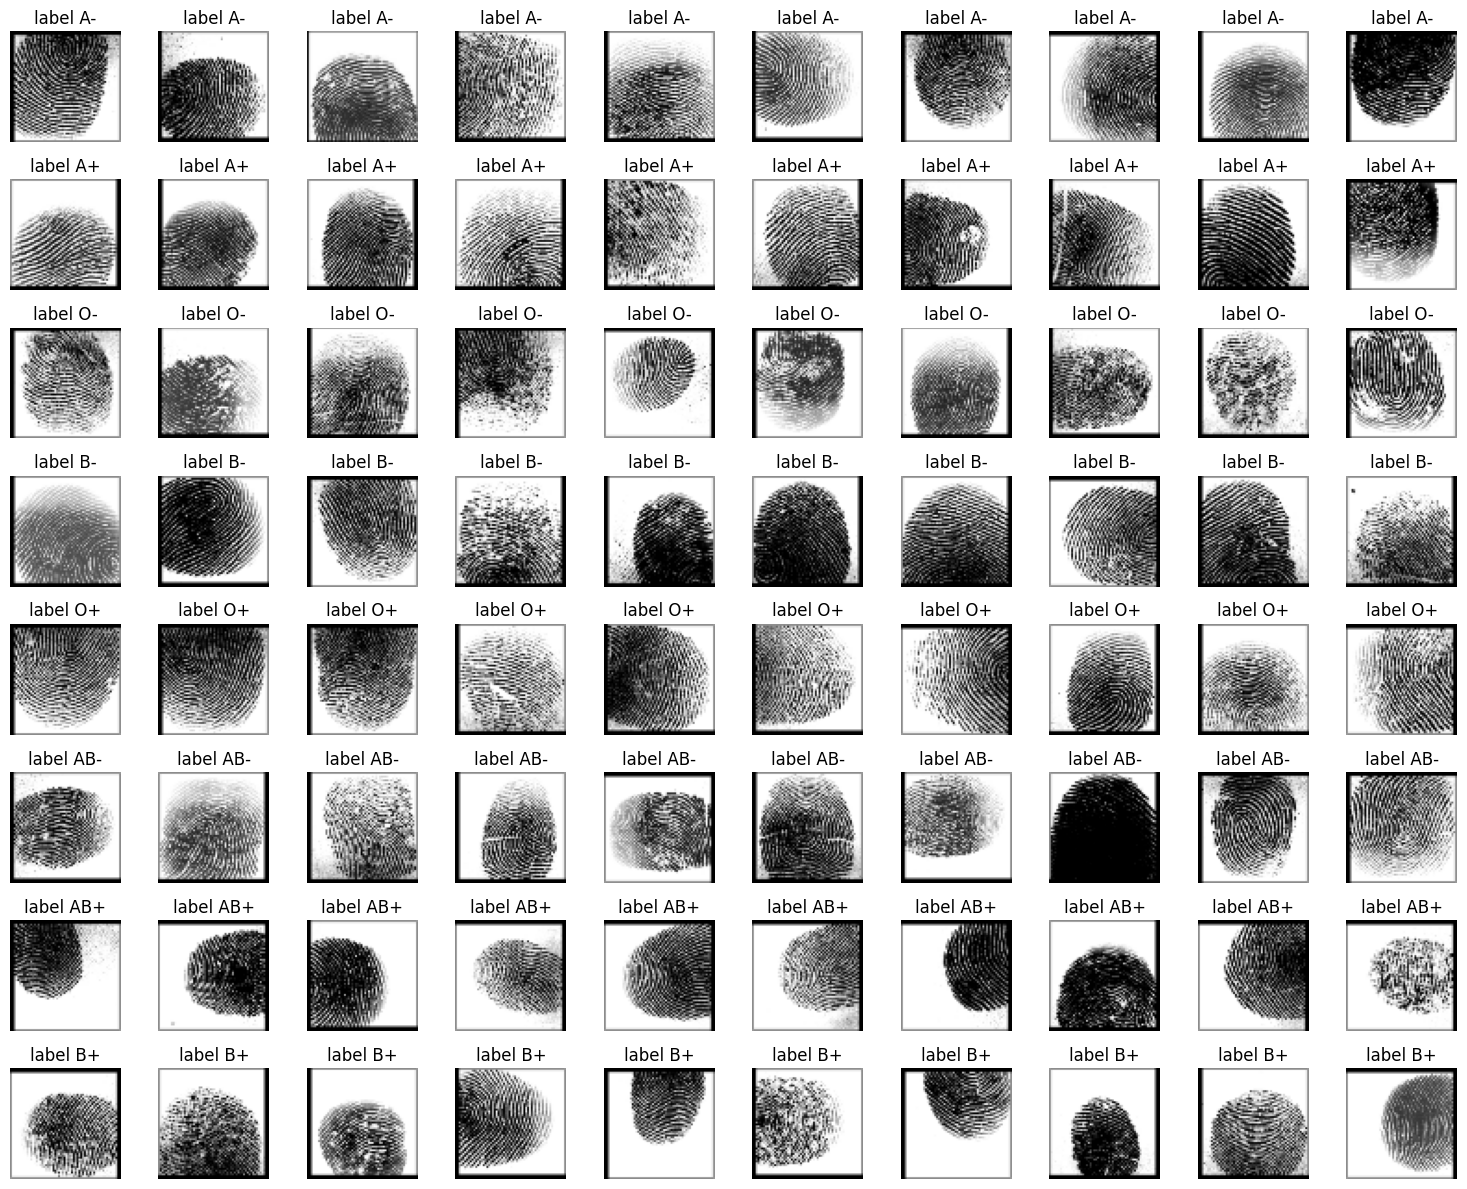

In [14]:
# create the visuals :
total_images = len(images_by_class) * 10 
cols = 10
rows = (total_images // cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 1.5))
index = 0

for label, images in images_by_class.items():
    for image in images:
        ax = axes.flat[index]
        ax.imshow(image.astype("uint8"))
        ax.axis('off')
        ax.set_title(f"label {ds_train.class_names[label]}")
        index += 1

plt.tight_layout()
plt.show()

In [15]:
# Load the data :
ds_visualization = tf.keras.preprocessing.image_dataset_from_directory(
    path_dir, # the directoryy
    labels = "inferred", # using the labels that exist in the folderss
    label_mode = "categorical", #one hot
    image_size = (image_height, image_width),
    shuffle = True,
    seed = 42
)

Found 30000 files belonging to 8 classes.


In [16]:
# extract the labels:
labels = []
for _, label in ds_visualization:
    for i in label:
        labels.append(i)

labels = np.array(labels)
print(f"Shape of labels: {labels.shape}")

Shape of labels: (30000, 8)


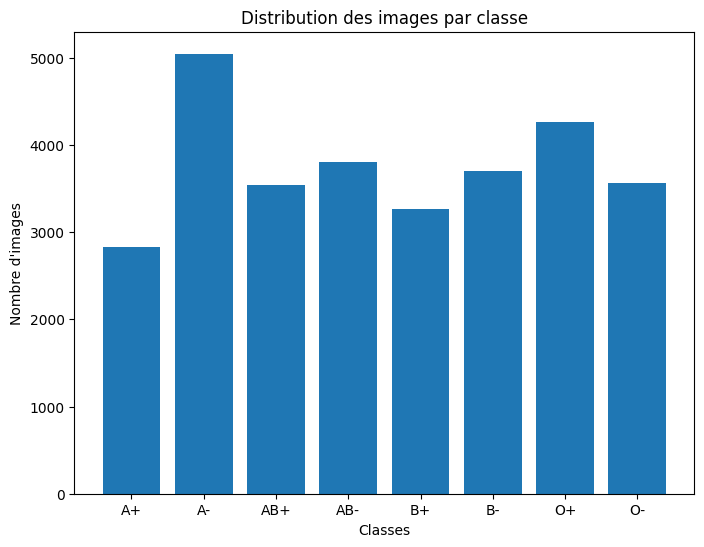

In [17]:
# one hot --> indices
labels_indices = [np.argmax(label) for label in labels]

# compute the number of images in each class
unique, counts = np.unique(labels_indices, return_counts=True)

# define the class names :
class_names = ds_visualization.class_names

# visuaa
plt.figure(figsize=(8, 6))
plt.bar(unique, counts, tick_label=[class_names[i] for i in unique])
plt.xlabel('Classes')
plt.ylabel('Nombre d\'images')
plt.title('Distribution des images par classe')
plt.xticks(unique)  
plt.show()

### 5. DATA NORMALIZATION :

In [19]:
# calculate the mean and std :
normalizer = Normalization(axis=-1)

normalizer.adapt(ds_train.map(lambda x, _: x))  

def normalize_with(image, label):
    image = normalizer(image)  
    return image, label

ds_train = ds_train.map(normalize_with)
ds_val = ds_val.map(normalize_with)
ds_test = ds_test.map(normalize_with)

### 6. DEFINE THE MODEL (BASED AND INCP FROM THE RESNET ARCHITECTURE) :

In [20]:
# Verify the GPU
print("GPU disponible :", tf.config.list_physical_devices('GPU'))

GPU disponible : [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [21]:
def identity_block(X, f, filters, initializer=random_uniform):
    """
    documentttaaatioon
    """
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = 1, strides = (1,1), padding = 'valid', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X) # Default axis
    X = Activation('relu')(X)
    
    ## Second component of main path 
    X = Conv2D(filters = F2, kernel_size = f, strides = (1, 1), padding = 'same', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    ## Third component of main path
    X = Conv2D(filters = F3, kernel_size = 1, strides = (1, 1), padding = 'valid', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    
    ## AddING shortcut value to main path
    X = Add()([X_shortcut, X])
    X = Activation('relu')(X)

    return X

In [22]:
def convolutional_block(X, f, filters, s = 2, initializer=glorot_uniform):
    """
    documentationnns
    """
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X

    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = 1, strides = (s, s), padding='valid', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    
    ## Second component of main path 
    X = Conv2D(filters = F2, kernel_size = f, strides = (1, 1), padding = 'same', kernel_initializer = initializer(seed=0))(X) 
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    ## Third component of main path 
    X = Conv2D(filters = F3, kernel_size = 1, strides = (1, 1), padding = 'valid', kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    
    # THE CONVOLUTIONAL BLOCK(RESNET S)
    X_shortcut = Conv2D(filters = F3, kernel_size = 1, strides = (s, s), padding = 'valid', kernel_initializer = initializer(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3)(X_shortcut)
    

    # Add shortcut value to main path
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [23]:
def ResNet50(input_shape = (60, 60, 3), classes = 8, training=False):
    """
    documentationns
    """
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])

    
    ## Stage 3 
    X = convolutional_block(X, f = 3, filters = [128,128,512], s = 2)
    X = identity_block(X, 3, filters = [128,128,512])
    X = identity_block(X, 3, filters = [128,128,512])
    X = identity_block(X, 3, filters = [128,128,512])

    # Stage 4 
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], s = 2)
    X = identity_block(X, 3, filters =  [256, 256, 1024])
    X = identity_block(X, 3, filters =  [256, 256, 1024])
    X = identity_block(X, 3, filters =  [256, 256, 1024])
    X = identity_block(X, 3, filters =  [256, 256, 1024])
    X = identity_block(X, 3, filters =  [256, 256, 1024])

    # Stage 5 
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], s = 2)
    X = identity_block(X, 3, filters =  [512, 512, 2048])
    X = identity_block(X, 3, filters =  [512, 512, 2048])

    # AVGPOOL
    X = AveragePooling2D((2, 2))(X)
    
    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X)

    return model

In [24]:
# defien the model and display the caracteristics :
model2 = ResNet50(input_shape = (60, 60, 3), classes = 8)
print(model2.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 60, 60, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 66, 66, 3)      │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 30, 30, 64)     │          9,472 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 30, 30, 64)     │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 30, 30, 64)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 14, 14, 64)     │              0 │ activation[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 14, 14, 64)     │          4,160 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 14, 14, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 14, 14, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 14, 14, 64)     │         36,928 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 14, 14, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 14, 14, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 14, 14, 256)    │         16,640 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 14, 14, 256)    │         16,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 14, 14, 256)    │          1,024 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 14, 14, 256)    │          1,024 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 23,604,104 (90.04 MB)

 Trainable params: 23,550,984 (89.84 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


### 7. TRAIN THE MODEL RESNET :

In [25]:
# set the param of the moidel:
opt = tf.keras.optimizers.Adam(learning_rate=0.00015)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
# train the model :
history = model2.fit(ds_train, epochs=20, validation_data=ds_val)

Epoch 1/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 105s 96ms/step - accuracy: 0.2421 - loss: 2.1405 - val_accuracy: 0.4100 - val_loss: 1.6062
Epoch 2/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 33s 58ms/step - accuracy: 0.4888 - loss: 1.3470 - val_accuracy: 0.6520 - val_loss: 0.9201
Epoch 3/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 33s 59ms/step - accuracy: 0.7116 - loss: 0.7705 - val_accuracy: 0.7446 - val_loss: 0.7097
Epoch 4/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 33s 58ms/step - accuracy: 0.8079 - loss: 0.5063 - val_accuracy: 0.7623 - val_loss: 0.7033
Epoch 5/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 33s 59ms/step - accuracy: 0.8562 - loss: 0.3874 - val_accuracy: 0.7228 - val_loss: 0.9929
Epoch 6/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 33s 59ms/step - accuracy: 0.8774 - loss: 0.3317 - val_accuracy: 0.7532 - val_loss: 0.8719
Epoch 7/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 33s 59ms/step - accuracy: 0.9043 - loss: 0.2648 - val_accuracy: 0.7178 - val_loss: 1.1373
Epoch 8/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 33s 59ms/step - accuracy: 0.9053 - loss: 0.2694 -

In [33]:
# evaluate the model:
model2.evaluate(ds_test)

187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8149 - loss: 0.7325


[0.7408360838890076, 0.8104946613311768]

<ipython-input-34-4b4bac2f31c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
<ipython-input-34-4b4bac2f31c4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

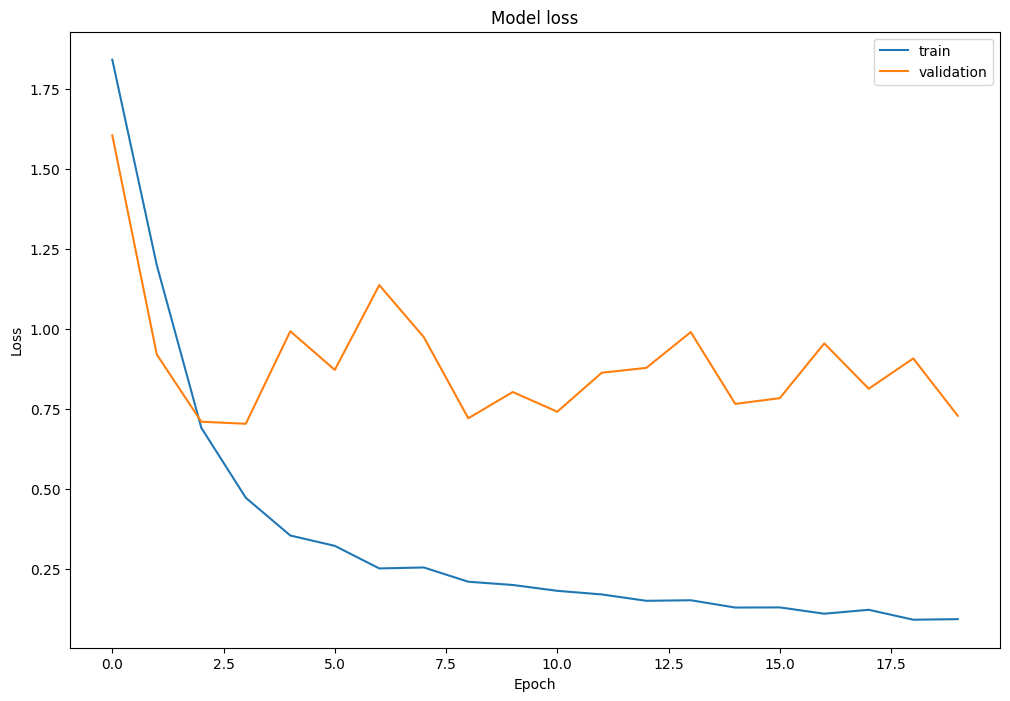

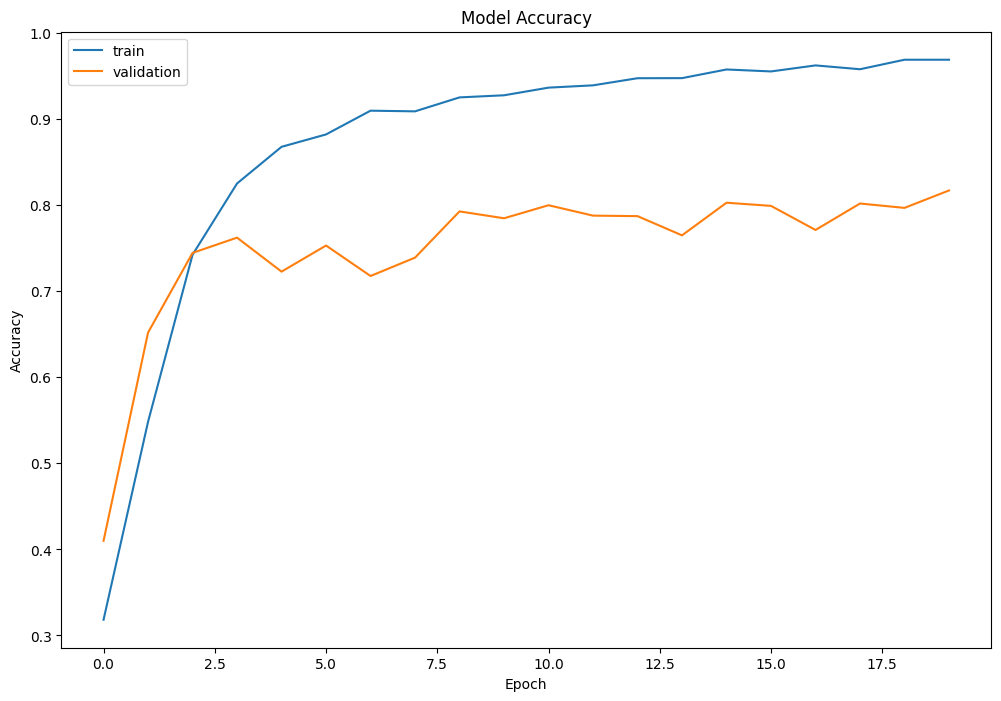

In [34]:
# visualisation accuracy and loss:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

### 8. Evaluation with Metrics :

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

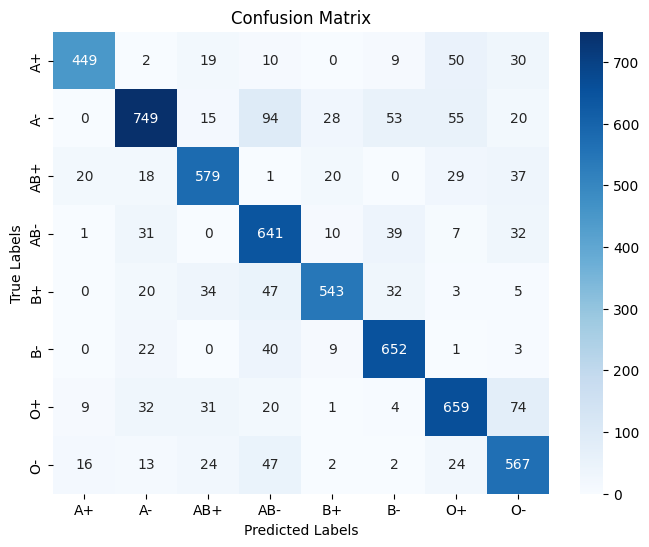

In [39]:
# Path to the dataset directory (the parent directory containing the class subfolders)
dataset_dir = path_dir

# Extract class names by listing subdirectories
class_names = os.listdir(dataset_dir)
class_names.sort()  # Sorting to ensure class names are ordered consistently

# Initialize empty lists to store true and predicted labels
true_labels = []
pred_labels = []

# Iterate through the test dataset
for images, labels in ds_test:
    # Get the true labels
    true_labels.append(labels.numpy())

    # Make predictions on the images
    predictions = model2.predict(images)
    pred_labels.append(np.argmax(predictions, axis=1))  # Get class index with highest probability

# Convert the lists to numpy arrays
true_labels = np.concatenate(true_labels, axis=0)
pred_labels = np.concatenate(pred_labels, axis=0)

# Compute the confusion matrix
cm = confusion_matrix(np.argmax(true_labels, axis=1), pred_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [41]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Initialize empty lists to store true and predicted labels
true_labels = []
pred_labels = []

# Iterate through the test dataset (ds_test)
for images, labels in ds_test:
    # Get the true labels (one-hot encoded)
    true_labels.append(labels.numpy())

    # Make predictions on the images
    predictions = model2.predict(images)
    pred_labels.append(np.argmax(predictions, axis=1))  # Get class index with highest probability

# Convert the lists to numpy arrays
true_labels = np.concatenate(true_labels, axis=0)
pred_labels = np.concatenate(pred_labels, axis=0)

# Calculate Precision, Recall, and F1 Score with weighted average
precision = precision_score(np.argmax(true_labels, axis=1), pred_labels, average='weighted')
recall = recall_score(np.argmax(true_labels, axis=1), pred_labels, average='weighted')
f1 = f1_score(np.argmax(true_labels, axis=1), pred_labels, average='weighted')

# Print the weighted metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# If you want individual class scores (not averaged)
precision_per_class = precision_score(np.argmax(true_labels, axis=1), pred_labels, average=None)
recall_per_class = recall_score(np.argmax(true_labels, axis=1), pred_labels, average=None)
f1_per_class = f1_score(np.argmax(true_labels, axis=1), pred_labels, average=None)

# Assuming you have class names, you can print individual scores per class
print("\nPrecision per class:")
for i, class_name in enumerate(class_names):
    print(f'{class_name}: {precision_per_class[i]:.4f}')

print("\nRecall per class:")
for i, class_name in enumerate(class_names):
    print(f'{class_name}: {recall_per_class[i]:.4f}')

print("\nF1 Score per class:")
for i, class_name in enumerate(class_names):
    print(f'{class_name}: {f1_per_class[i]:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [27]:
# train the model :
history = model2.fit(ds_train, epochs=10, validation_data=ds_val)

Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.9360 - loss: 0.1853 - val_accuracy: 0.7857 - val_loss: 0.8242
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.9357 - loss: 0.1799 - val_accuracy: 0.7943 - val_loss: 0.7906
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.9503 - loss: 0.1370 - val_accuracy: 0.7997 - val_loss: 0.7523
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.9398 - loss: 0.1721 - val_accuracy: 0.7899 - val_loss: 0.8846
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.9588 - loss: 0.1206 - val_accuracy: 0.8048 - val_loss: 0.7615
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.9541 - loss: 0.1303 - val_accuracy: 0.7997 - val_loss: 0.8513
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.9582 - loss: 0.1295 - val_accuracy: 0.7972 - val_loss: 0.8233
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.9612 - loss: 0.1179 - 

In [28]:
# evaluate the model:
model2.evaluate(ds_test)

187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8337 - loss: 0.6135


[0.6457328200340271, 0.8310494422912598]

In [29]:
# train the model :
history = model2.fit(ds_train, epochs=10, validation_data=ds_val)

Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.9706 - loss: 0.0842 - val_accuracy: 0.8007 - val_loss: 0.8619
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.9665 - loss: 0.0971 - val_accuracy: 0.8299 - val_loss: 0.6741
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.9724 - loss: 0.0766 - val_accuracy: 0.8134 - val_loss: 0.8139
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.9711 - loss: 0.0885 - val_accuracy: 0.8220 - val_loss: 0.7391
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - accuracy: 0.9760 - loss: 0.0698 - val_accuracy: 0.8289 - val_loss: 0.6840
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - accuracy: 0.9788 - loss: 0.0653 - val_accuracy: 0.7937 - val_loss: 0.9226
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - accuracy: 0.9796 - loss: 0.0647 - val_accuracy: 0.8030 - val_loss: 0.8331
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.9738 - loss: 0.0766 - 

In [30]:
# evaluate the model:
model2.evaluate(ds_test)

187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8386 - loss: 0.6682


[0.6591542959213257, 0.8373997211456299]

### 9. THE ADD DROPOUT :

In [39]:
def ResNet50_v2(input_shape=(60, 60, 3), classes=8, training=False):
    """
    ResNet50_v2 avec Dropout pour éviter l'overfitting.
    """
    # Définir l'entrée comme un tenseur avec la forme input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Ajouter Dropout pour réduire l'overfitting
    X = Dropout(0.2)(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], s=1)
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])

    X = Dropout(0.3)(X)  # Ajout d'un Dropout après le bloc de convolution

    # Stage 3
    X = convolutional_block(X, f=3, filters=[128, 128, 512], s=2)
    X = identity_block(X, 3, filters=[128, 128, 512])
    X = identity_block(X, 3, filters=[128, 128, 512])
    X = identity_block(X, 3, filters=[128, 128, 512])

    X = Dropout(0.3)(X)  # Dropout après le stage 3

    # Stage 4
    X = convolutional_block(X, f=3, filters=[256, 256, 1024], s=2)
    X = identity_block(X, 3, filters=[256, 256, 1024])
    X = identity_block(X, 3, filters=[256, 256, 1024])
    X = identity_block(X, 3, filters=[256, 256, 1024])
    X = identity_block(X, 3, filters=[256, 256, 1024])
    X = identity_block(X, 3, filters=[256, 256, 1024])

    X = Dropout(0.4)(X)  # Dropout après le stage 4

    # Stage 5
    X = convolutional_block(X, f=3, filters=[512, 512, 2048], s=2)
    X = identity_block(X, 3, filters=[512, 512, 2048])
    X = identity_block(X, 3, filters=[512, 512, 2048])

    # Dropout après le stage 5
    X = Dropout(0.4)(X)

    # AVGPOOL
    X = AveragePooling2D((2, 2))(X)

    # Ajouter un Dropout avant la couche fully connected
    X = Dropout(0.5)(X)

    # Couche de sortie
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', kernel_initializer=glorot_uniform(seed=0))(X)

    # Créer le modèle
    model = Model(inputs=X_input, outputs=X)

    return model

In [40]:
# defien the model and display the caracteristics :
model3 = ResNet50_v2(input_shape = (60, 60, 3), classes = 8)
print(model3.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 60, 60, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_2          │ (None, 66, 66, 3)      │              0 │ input_layer_2[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_54 (Conv2D)        │ (None, 30, 30, 64)     │          9,472 │ zero_padding2d_2[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_54    │ (None, 30, 30, 64)     │            256 │ conv2d_54[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_50             │ (None, 30, 30, 64)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 14, 14, 64)     │              0 │ activation_50[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 14, 14, 64)     │              0 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_55 (Conv2D)        │ (None, 14, 14, 64)     │          4,160 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_55    │ (None, 14, 14, 64)     │            256 │ conv2d_55[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_51             │ (None, 14, 14, 64)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_56 (Conv2D)        │ (None, 14, 14, 64)     │         36,928 │ activation_51[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_56    │ (None, 14, 14, 64)     │            256 │ conv2d_56[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_52             │ (None, 14, 14, 64)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_57 (Conv2D)        │ (None, 14, 14, 256)    │         16,640 │ activation_52[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_58 (Conv2D)        │ (None, 14, 14, 256)    │         16,640 │ dropout[0][0]          │
├──────────────────────

 Total params: 23,604,104 (90.04 MB)

 Trainable params: 23,550,984 (89.84 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


In [41]:
# set the param of the moidel:
opt = tf.keras.optimizers.Adam(learning_rate=0.0015)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
# train the model :
history = model3.fit(ds_train, epochs=20, validation_data=ds_val)

Epoch 1/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 106s 99ms/step - accuracy: 0.1595 - loss: 3.5765 - val_accuracy: 0.1102 - val_loss: 481.4490
Epoch 2/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 32s 56ms/step - accuracy: 0.2296 - loss: 2.4535 - val_accuracy: 0.1394 - val_loss: 19.1302
Epoch 3/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 32s 56ms/step - accuracy: 0.2796 - loss: 2.0370 - val_accuracy: 0.1428 - val_loss: 171.7270
Epoch 4/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.2889 - loss: 1.9267 - val_accuracy: 0.2912 - val_loss: 6.0812
Epoch 5/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 32s 56ms/step - accuracy: 0.2971 - loss: 1.8623 - val_accuracy: 0.3741 - val_loss: 1.7428
Epoch 6/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 32s 56ms/step - accuracy: 0.3879 - loss: 1.6345 - val_accuracy: 0.5457 - val_loss: 1.5072
Epoch 7/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - accuracy: 0.6034 - loss: 1.1178 - val_accuracy: 0.5970 - val_loss: 1.3059
Epoch 8/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 32s 56ms/step - accuracy: 0.7033 - loss: 0.8

In [43]:
# evaluate the model:
model3.evaluate(ds_test)

187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8282 - loss: 0.9252


[0.8719727396965027, 0.8195187449455261]

<ipython-input-50-6f0b572a3cc2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train'},inplace=True)
<ipython-input-50-6f0b572a3cc2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

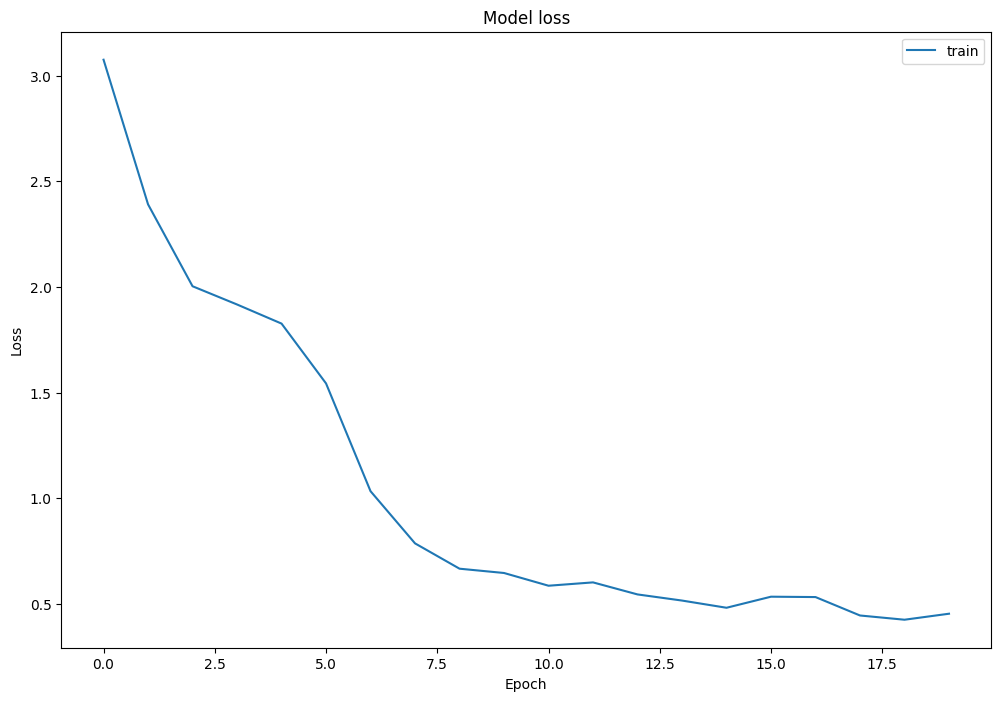

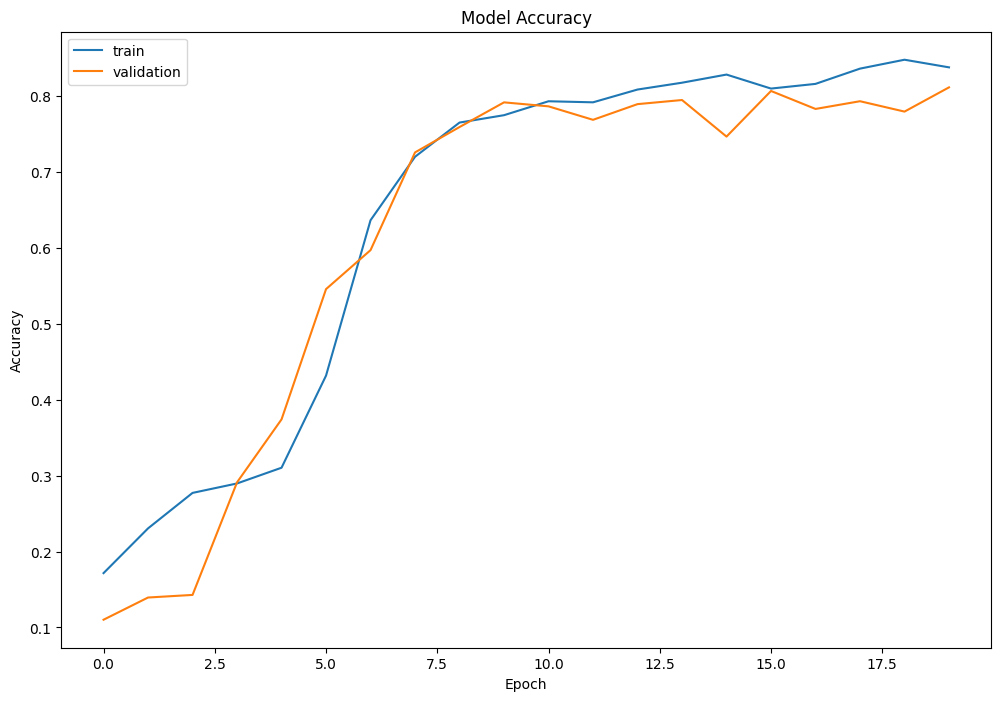

In [50]:
# visualisation accuracy and loss:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss']]
df_loss.rename(columns={'loss':'train'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [51]:
# metrics :
y_pred = model3.predict(ds_test)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true = []
for _, labels in ds_test: 
    y_true.extend(np.argmax(labels.numpy(), axis=1))

y_true = np.array(y_true)

187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step


In [56]:
# train the model :
history = model3.fit(ds_train, epochs=20, validation_data=ds_val)

Epoch 1/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 32s 57ms/step - accuracy: 0.8544 - loss: 0.4162 - val_accuracy: 0.8478 - val_loss: 0.4228
Epoch 2/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - accuracy: 0.8595 - loss: 0.4069 - val_accuracy: 0.8509 - val_loss: 0.4943
Epoch 3/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - accuracy: 0.8702 - loss: 0.3542 - val_accuracy: 0.8325 - val_loss: 0.4723
Epoch 4/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 32s 56ms/step - accuracy: 0.8573 - loss: 0.4054 - val_accuracy: 0.8362 - val_loss: 0.4628
Epoch 5/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - accuracy: 0.8673 - loss: 0.3693 - val_accuracy: 0.8238 - val_loss: 0.9488
Epoch 6/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 32s 56ms/step - accuracy: 0.8706 - loss: 0.3601 - val_accuracy: 0.8324 - val_loss: 0.7391
Epoch 7/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - accuracy: 0.8839 - loss: 0.3359 - val_accuracy: 0.8380 - val_loss: 0.4671
Epoch 8/20
563/563 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - accuracy: 0.8791 - loss: 0.3528 - 

In [57]:
# evaluate the model:
model3.evaluate(ds_test)

187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8684 - loss: 0.4358


[0.4349641501903534, 0.8661430478096008]